In [1]:
!pwd

/Users/giakhang/dev/YOLOF_MaskV2_mmcv


In [2]:
# Check Pytorch installation
import torch, torchvision
print("torch version:",torch.__version__, "cuda:",torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print("mmdetection:",mmdet.__version__)

# Check mmcv installation
import mmcv
print("mmcv:",mmcv.__version__)

# Check mmengine installation
import mmengine
print("mmengine:",mmengine.__version__)

/Users/giakhang/miniconda3/envs/yolof_maskv2_mmcv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch version: 1.13.1 cuda: False
mmdetection: 3.3.0
mmcv: 2.0.0rc4
mmengine: 0.10.7


In [3]:
import mmcv
import mmengine
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules

config_file = './configs/yolof_r50-c5_8xb8-1x_coco.py'
ckpt_file = '/Users/giakhang/Downloads/yolof_r50_c5_8x8_1x_coco_20210425_024427-8e864411.pth'

# register all modules in mmdet into the registries
register_all_modules()

# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint=ckpt_file, device='cpu') 

Loads checkpoint by local backend from path: /Users/giakhang/Downloads/yolof_r50_c5_8x8_1x_coco_20210425_024427-8e864411.pth


In [4]:
image = mmcv.imread('./datasets/coco2017/val2017/000000000139.jpg',channel_order='rgb')
result = inference_detector(model, image)
print(result)

<DetDataSample(

    META INFORMATION
    img_shape: (800, 1202)
    img_path: None
    batch_input_shape: (800, 1216)
    img_id: 0
    ori_shape: (426, 640)
    scale_factor: (1.878125, 1.8779342723004695)
    pad_shape: (800, 1216)

    DATA FIELDS
    ignored_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            labels: tensor([], dtype=torch.int64)
            bboxes: tensor([], size=(0, 4))
        ) at 0x161adf730>
    gt_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            labels: tensor([], dtype=torch.int64)
            bboxes: tensor([], size=(0, 4))
        ) at 0x161adf640>
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            labels: tensor([62, 56, 56, 56, 62, 75, 75, 74, 75,  0, 39, 75, 58, 60, 75, 60, 58, 56,
                        56, 56, 75, 56, 58, 72, 60, 56, 60, 56, 56, 58, 60, 72, 56, 75, 6

In [5]:
from mmdet.registry import VISUALIZERS
# init visualizer(run the block only once in jupyter notebook)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

/Users/giakhang/miniconda3/envs/yolof_maskv2_mmcv/lib/python3.10/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


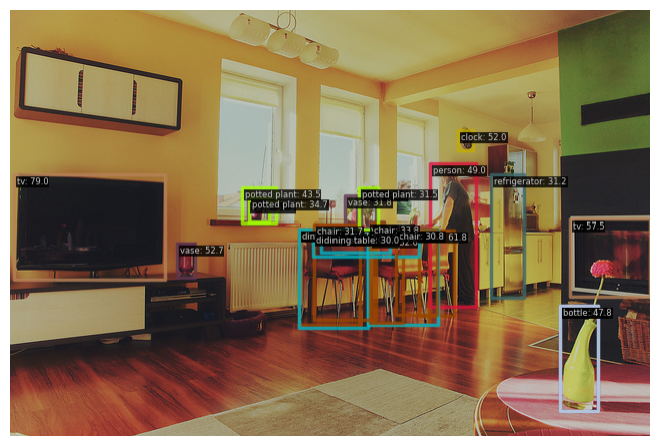

In [6]:
# show the results
visualizer.add_datasample(
    'result',
    image,
    data_sample=result,
    draw_gt = None,
    wait_time=0,
)
visualizer.show()